In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from gensim.models import Word2Vec
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\91852\Downloads\DS internship\reviews_badminton\data.csv")

In [3]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df[df.duplicated()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isna().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [7]:
df['Review text'].ffill(inplace=True)

In [8]:
df['Sentiment'] = df['Ratings'].apply(lambda x: 1 if x > 3 else 0)

<Axes: xlabel='Sentiment'>

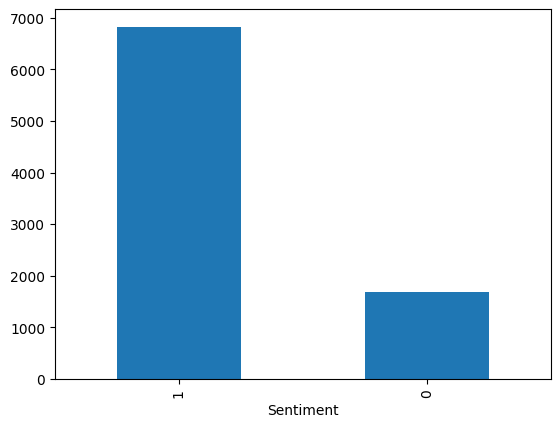

In [9]:
df['Sentiment'].value_counts().plot(kind='bar')

In [10]:
df['Review text'] =df['Review text'].str.strip("READ MORE")

In [11]:
df.loc[36,'Review text':]

Review text    Very bad quality.
Ratings                        1
Sentiment                      0
Name: 36, dtype: object

In [12]:
import string

lemmatizer = WordNetLemmatizer()

In [13]:
def clean(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'www.\S+|https?://\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove non-alphanumeric characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text



In [14]:
df['clean_text'] = df['Review text'].apply(clean)

In [15]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment,clean_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0,supplied yonex mavis outside cover yonex ad in...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0,worst product damaged shuttlecock packed new b...
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,0,quite k nowadays quality cork like year back u...
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,ver pricedJust â?¹620 ..from retailer.I didn't...,1,0,ver pricedjust retailer understand wat advanta...
...,...,...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1,0,sure charged product mrp okay pay r product co...
8510,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1,0,sure charged product mrp okay pay r product co...
8512,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,2,0,sure charged product mrp okay pay r product co...
8513,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,5,1,sure charged product mrp okay pay r product co...


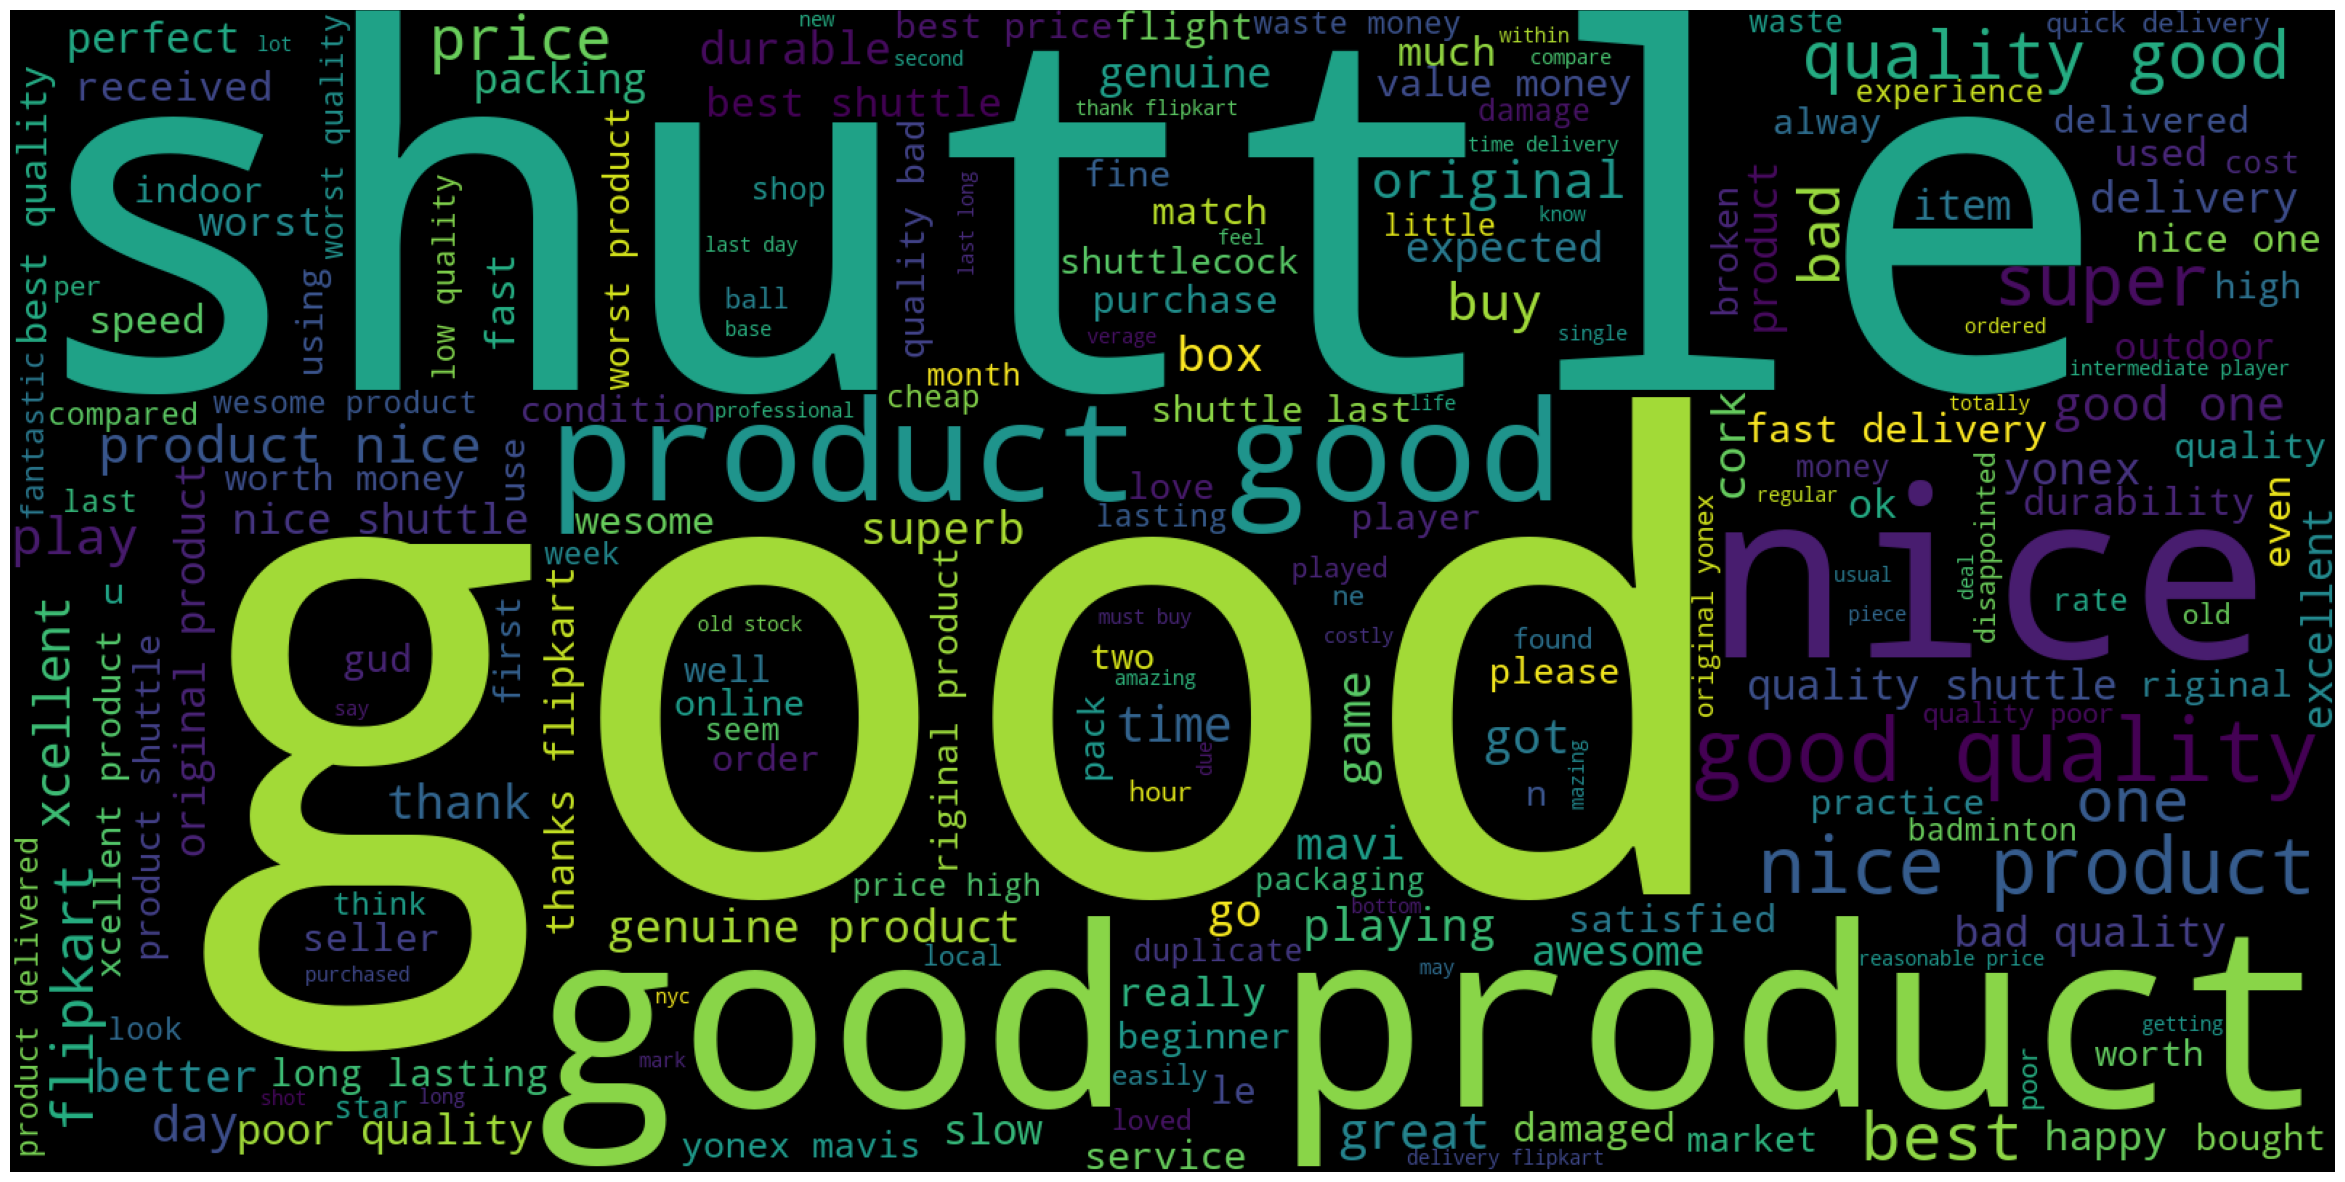

In [16]:
wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['clean_text']))
plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
y = df['Sentiment']
X= df['clean_text']
print(X.shape, y.shape)

(8514,) (8514,)


### Split the data into training set and test set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
X_train

2471    great shuttle practice lasting set heavy play
7952                                             good
2225                                             good
1372                                             good
7938                                             good
                            ...                      
5734                          genuine orginal product
5191                           badminton shuttle good
5390                             best quality shuttle
860                                        nice happy
7270                                     good product
Name: clean_text, Length: 6811, dtype: object

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6811,) (6811,)
(1703,) (1703,)


### Training Data Preprocessing

#### Converting Text to Numerical vectors - BOW Representation

In [22]:
X_train

2471    great shuttle practice lasting set heavy play
7952                                             good
2225                                             good
1372                                             good
7938                                             good
                            ...                      
5734                          genuine orginal product
5191                           badminton shuttle good
5390                             best quality shuttle
860                                        nice happy
7270                                     good product
Name: clean_text, Length: 6811, dtype: object

In [23]:

vect = CountVectorizer()

# use it to extract features from training data
X_train_num = vect.fit_transform(X_train)

print(X_train_num.shape)

(6811, 2287)


In [24]:
X_train_num

<6811x2287 sparse matrix of type '<class 'numpy.int64'>'
	with 22367 stored elements in Compressed Sparse Row format>

In [25]:
print("Total unique words:", len(vect.vocabulary_))

print("Type of train features:", type(X_train_num))

print("Shape of input data:", X_train_num.shape)

Total unique words: 2287
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (6811, 2287)


### Test Data Preprocessing

In [26]:
X_test

4393    regularly playing mavis durable good cost effe...
4503                                          nic product
5937                                                  osm
8251                                               urable
932                                                 super
                              ...                        
7429    bought twice really cool worth buying online e...
549     product good received stock month befor manufa...
5382              got latest one old stock packaging good
764                                       good high price
6855                                             xcellent
Name: clean_text, Length: 1703, dtype: object

In [27]:
X_test_num = vect.transform(X_test)

In [28]:
X_test_num

<1703x2287 sparse matrix of type '<class 'numpy.int64'>'
	with 5196 stored elements in Compressed Sparse Row format>

In [29]:
print("Total unique words:", len(vect.vocabulary_))

print("Type of train features:", type(X_test_num))

print("Shape of input data:", X_test_num.shape)

Total unique words: 2287
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (1703, 2287)


### Logistic Regression Model:

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,make_scorer, precision_score,f1_score,confusion_matrix, classification_report
classifier = LogisticRegression()
classifier.fit(X_train_num, y_train)

LogisticRegression()

In [31]:
y_train_pred = classifier.predict(X_train_num)

In [32]:
train_score=accuracy_score(y_train,y_train_pred)
print("Train Socre = ", train_score)
print(classification_report(y_train, y_train_pred))

Train Socre =  0.9091176038760828
              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1366
           1       0.91      0.99      0.95      5445

    accuracy                           0.91      6811
   macro avg       0.91      0.79      0.84      6811
weighted avg       0.91      0.91      0.90      6811



In [33]:
y_test_pred= classifier.predict(X_test_num)

In [34]:
test_score = accuracy_score(y_test, y_test_pred)
print("Test Score = ", test_score)
print(classification_report(y_test, y_test_pred))

Test Score =  0.8896065766294774
              precision    recall  f1-score   support

           0       0.84      0.52      0.64       323
           1       0.90      0.98      0.93      1380

    accuracy                           0.89      1703
   macro avg       0.87      0.75      0.79      1703
weighted avg       0.89      0.89      0.88      1703



### Decision Tree Model:

In [35]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()

In [36]:
DTclassifier.fit(X_train_num, y_train)

DecisionTreeClassifier()

In [37]:
y_train_pred = DTclassifier.predict(X_train_num)

In [38]:
train_score=accuracy_score(y_train,y_train_pred)
print("Train Socre = ", train_score)
print(classification_report(y_train, y_train_pred))

Train Socre =  0.951255322272794
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1366
           1       0.95      0.99      0.97      5445

    accuracy                           0.95      6811
   macro avg       0.95      0.89      0.92      6811
weighted avg       0.95      0.95      0.95      6811



In [39]:
y_test_pred= DTclassifier.predict(X_test_num)

In [40]:
test_score = accuracy_score(y_test, y_test_pred)
print("Test Score = ", test_score)
print(classification_report(y_test, y_test_pred))

Test Score =  0.8596594245449207
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       323
           1       0.90      0.93      0.92      1380

    accuracy                           0.86      1703
   macro avg       0.78      0.74      0.76      1703
weighted avg       0.85      0.86      0.85      1703



### Random Forest Model:

In [41]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train_num, y_train)

RandomForestClassifier()

In [42]:
y_train_pred = RFclassifier.predict(X_train_num)

In [43]:
print("Train Socre = ", accuracy_score(y_train,y_train_pred))
print(classification_report(y_train, y_train_pred))

Train Socre =  0.951255322272794
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1366
           1       0.95      0.99      0.97      5445

    accuracy                           0.95      6811
   macro avg       0.96      0.89      0.92      6811
weighted avg       0.95      0.95      0.95      6811



In [44]:
y_test_pred= RFclassifier.predict(X_test_num)

In [45]:
test_score = accuracy_score(y_test, y_test_pred)
print("Test Score = ", test_score)
print(classification_report(y_test, y_test_pred))

Test Score =  0.8837345860246624
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       323
           1       0.90      0.96      0.93      1380

    accuracy                           0.88      1703
   macro avg       0.84      0.76      0.79      1703
weighted avg       0.88      0.88      0.88      1703



### Navie Baye's

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train_num,y_train)

MultinomialNB()

In [47]:
y_train_pred = nb.predict(X_train_num)
train_score=accuracy_score(y_train,y_train_pred)
print(train_score)

0.9022170019086772


In [48]:
pred=nb.predict(X_test_num)
test_score=accuracy_score(pred,y_test)
print(test_score)

0.8872577803875514


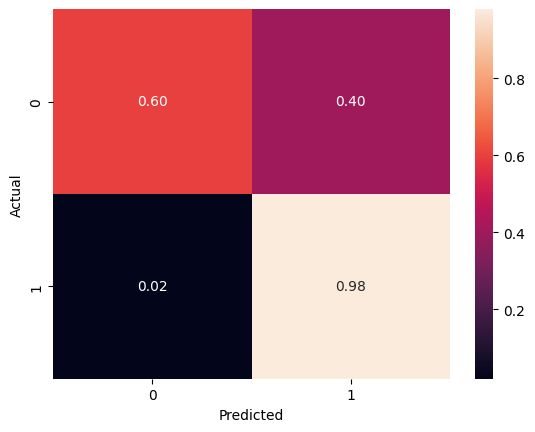

In [49]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
actual = np.sum(conf_matrix, axis=1).reshape(-1, 1)
conf_matrix_normalized = np.round(conf_matrix / actual, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:

import joblib
import os
from sklearn.metrics import accuracy_score,make_scorer, precision_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'decision_tree': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
    
        }
    ]
}

# Assuming X_train and y_train are defined earlier
# Perform GridSearchCV for each algorithm

best_models = {}


# Update scoring parameter in GridSearchCV
for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1)

    grid_search.fit(X_train, y_train)
    best_models[algo] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
F1 Score on Test Data: 0.9323570432357045
********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
F1 Score on Test Data: 0.9215686274509803
********** logistic_regression **********
Fitting 5 folds for each of 48 candidates, totalling 240 fits
F1 Score on Test Data: 0.8972853998532648


In [55]:
import os
os.getcwd()

'C:\\Users\\91852\\Innomatics Data Science\\DS Internship'

In [57]:
# Serialization

best_model = grid_search.best_estimator_

joblib.dump(best_model, r'C:\Users\91852\Innomatics Data Science\DS Internship\Sentiment_analysis_project\model.pkl')

['C:\\Users\\91852\\Innomatics Data Science\\DS Internship\\Sentiment_analysis_project\\model.pkl']

In [58]:
save_dir = r'C:\\Users\\91852\\Innomatics Data Science\\DS Internship\\Sentiment_analysis_project'

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    path = os.path.join(save_dir, f'{name}.pkl')

    try:
        joblib.dump(model, path)
        loaded_model = joblib.load(path)

        y_test_pred = loaded_model.predict(X_test)

        f1 = f1_score(y_test, y_test_pred, pos_label=1)

        print("F1 Score (Positive Class):", f1)
        print("Model Size:", os.path.getsize(path), "Bytes")
    except FileNotFoundError:
        print("Error: File not found at", path)
    except Exception as e:
        print("An error occurred:", e)

********** naive_bayes **********
F1 Score (Positive Class): 0.9323570432357045
Model Size: 129191 Bytes
********** decision_tree **********
F1 Score (Positive Class): 0.9215686274509803
Model Size: 82749 Bytes
********** logistic_regression **********
F1 Score (Positive Class): 0.8972853998532648
Model Size: 113706 Bytes
